In [566]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from itertools import accumulate
import math

In [741]:
class Performative_Regression:

    def __init__(self, k, n , T, sigma=0.1, M=1):
        """
        k : polynomial degree
        """
        self.k = k
        self.n = n
        self.T = T
        self.sigma = sigma
        self.thetas = np.cos(np.pi * (2*np.arange(1, self.k+2) - 1 ) / (2*(self.k + 1)))

        self.f_hat_values = self.f_hat()

        self.V = self.vandermonde_matrix()
        self.V_det = self.vandermonde_determinant()

        self.M = M
        
    def f(self, theta):
        """
        Input:
            theta: float, a number between -1 and 1
        Output:
            f(theta): float, a function of theta
        """

        fun = np.cos(theta) - np.sin(theta)
        
        return fun
    
    def f_hat(self):
        """ 
        Input:
            None
        Output:
            f_hat: array (k+1, ) with element i equal to f_hat(theta_i) where
            theta_i is the ith Chebyshev node
        """
        
        Y = (
            np.repeat(self.f(self.thetas)[:, np.newaxis], self.n, axis=1) +
            np.random.normal(0, self.sigma, (self.k+1, self.n))
        )

        f_hat = np.mean(Y, axis=1)

        return f_hat

    def vandermonde_matrix(self):
        """
        Input:
            None
        Output:
            V: array (k+1, k+1), the Vandermonde matrix with Chebyshev nodes
        """

        return np.vander(self.thetas, increasing=True)

    def vandermonde_determinant(self):
        """
        Input:
            None
        Output:
            det: float, the determinant of the Vandermonde matrix
        """

        det = (-1)**((self.k+1) * self.k / 2 ) * ((self.k+1)**(self.k+1) / 2**(self.k*self.k))**(1/2)
        
        return det   
    
    def true_objective_function(self, theta):
        """
        Input: 
            theta: float, a number between -1 and 1
        Output:
            f(theta)^2 - 2*theta*f(theta) + theta^2
            The true objective function, evaluated at theta
        """

        return self.f(theta)**2 - 2 * theta * self.f(theta) + theta**2
    
    def g_hat(self, theta):

        p_theta = 0
        for i in range(k+1):
            prod = 1
            for j in range(k+1):
                if j != i:
                    prod = prod * (theta - self.thetas[j]) / (self.thetas[i] - self.thetas[j])

            p_theta = p_theta + prod * self.f_hat_values[i]
        
        return p_theta

    def estimated_objective_function(self, theta):
        """
        Input:
            theta: float, a number between -1 and 1
        Output:
            p(theta)^2 - 2*theta*p(theta) + theta^2
            The estimated objective function evaluated at theta
        """

        p_theta = 0
        for i in range(k+1):
            prod = 1
            for j in range(k+1):
                if j != i:
                    prod = prod * (theta - self.thetas[j]) / (self.thetas[i] - self.thetas[j])

            p_theta = p_theta + prod * self.f_hat_values[i]

        return p_theta**2 - 2 * theta * p_theta + theta**2
    
    def plot_everything(self):
        
        t1 = np.linspace(-1, 1, 1000)
        t2 = np.linspace(-1, 1, 1000)



        plt.figure(figsize=(10, 7))
        plt.plot(t1, self.f(t1), label=r'$f(\theta)$')
        plt.plot(t1, self.true_objective_function(t1), 'k', label='true objective')
        plt.plot(t2, self.estimated_objective_function(t2), 'r--', label=f'estimated objective for k={self.k}')
        plt.xlabel(r"$\theta$")
        #plt.ylim(0, 25)
        plt.legend(loc='upper right')
        plt.grid()
        plt.show()

    def plot_f_vs_g(self):
        
        t = np.linspace(-1, 1, 1000)
        ci = self.conf_interval_at_theta(t)
        plt.figure(figsize=(10, 7))
        plt.plot(t, self.f(t), 'k')
        plt.plot(t, self.g_hat(t))
        plt.fill_between(t, self.g_hat(t) + ci, self.g_hat(t) - ci, alpha=0.3)
        plt.grid()
        plt.show()

    def remainder(self, theta):
        prod = 1
        for i in range(self.k+1):
            prod = prod * (theta - self.thetas[i])

        return self.M * np.abs(prod) / math.factorial(self.k + 1)

    def lagrange_bound(self, theta):

        sum_L_i = 0
        for i in range(self.k+1):
            prod = 1
            for j in range(self.k+1):
                if j != i:
                    prod = prod * (theta - self.thetas[j]) / (self.thetas[i] - self.thetas[j])

            sum_L_i += np.abs(prod)

        return sum_L_i
    
    def conf_interval_at_theta(self, theta):

        B_1 = self.remainder(theta)
        B_2 = self.lagrange_bound(theta) * 1.96 * self.sigma / np.sqrt(self.n)

        return B_1 + B_2


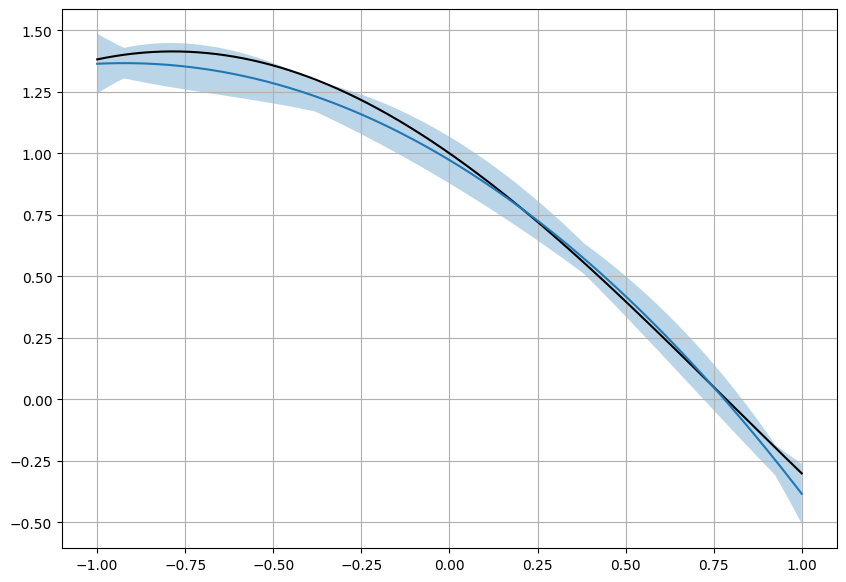

In [742]:
k=3
pr = Performative_Regression(k=k, n=10, T=100, sigma=0.1, M=np.sqrt(2))

pr.plot_f_vs_g()